Problem 1 (70pts) In this exercise, we will implement different methods to find the area of the unit circle. Namely, we want to compute

$$
\int_{0}^{1} \sqrt{1-x^{2}} \mathrm{~d} x
$$

We all know the true value is $\pi / 4$. Let $f(x)=\sqrt{1-x^{2}}$.

- Implement uniform interval mid-point rule: For each $M$, the quadrature points are given by

$$
b_{i}=\frac{1}{M}, \quad c_{i}=\frac{1}{2 M}+\frac{i-1}{M}, \quad i=1,2, \ldots, M
$$

Compute

$$
\bar{f}_{M}:=\sum_{i=1}^{M} b_{i} f\left(c_{i}\right)
$$

for $M=2,3, \ldots, 30$. Plot the error $\left|\bar{f}_{M}-\pi / 4\right|$.

## Solution:

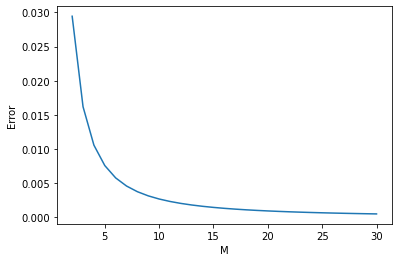

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define the midpoint rule
def midpoint_rule(M):
    b = 1/M
    c = np.array([(0.5/M) + (i-1)/M for i in range(1,M+1)])
    f_M = np.sum(b*f(c))
    return f_M
def f(x):
    return np.sqrt(1-x**2)

M_values = range(2, 31)
errors = []

for M in M_values:
    error = abs(midpoint_rule(M) - (np.pi/4))
    errors.append(error)

plt.plot(M_values, errors)
plt.xlabel('M')
plt.ylabel('Error')
plt.show()


- The Gaussian quadrature points for $U[-1,1]$ is given by

$$
b_{1}=\frac{4}{9}, \quad c_{1}=0, \quad b_{2}=b_{3}=\frac{5}{18}, \quad c_{2}, c_{3}= \pm \sqrt{\frac{3}{5}}
$$

Compute

$$
\int_{0}^{1} \sqrt{1-x^{2}} \mathrm{~d} x=\frac{1}{2} \int_{-1}^{1} \sqrt{1-x^{2}} \mathrm{~d} x
$$

using the given quadrature points. Compare the result with the mid-point rule above with the same number of evaluation.

## Solution:

In [2]:
# Gaussian quadrature
b = np.array([4/9, 5/18, 5/18])
c = np.array([0, np.sqrt(3/5), -np.sqrt(3/5)])
result_gq = 0.5 * sum([b[i]*f(c[i]) for i in range(len(b))])
print(f"Gaussian quadrature result: {result_gq}")

# Mid-point rule
M = 3 #3 quadrature points given by c1, c2, and c3.
result_mp = midpoint_rule(M)
print(f"Mid-point rule result: {result_mp}")


Gaussian quadrature result: 0.3979043144537988
Mid-point rule result: 0.8016031664534248


### The true value of the definite integral is π/4≈0.7853981633974483. It seems that in this case, the Mid-point rule result result is closer to the true value than the Gaussian quadrature result.

- Consider the Monte Carlo method as follows: (1) Draw $M$ pair of random numbers $(x, y)$ on $[0,1] \times[0,1]$ uniformly. (2) If the point $(x, y)$ lies in the circle, that is, $x^{2}+y^{2} \leq 1$, then we record this as a 'hit'. (3) The area is now approximated by

$$
\bar{f}_{\mathrm{MC}}:=\frac{\text { number of hits }}{M}
$$

Perform a single simulation for each value of $M=10,20,30, \ldots, 500$. Plot the result versus $M$. Draw a horizontal line at the true value $f=\pi / 4$.


## Solution:

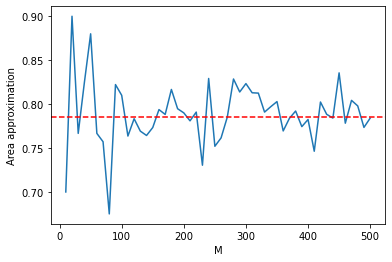

In [3]:
# Set the number of simulations
M_values = np.arange(10, 510, 10)
results = []

for M in M_values:
    # Draw M pairs of random numbers
    x = np.random.uniform(0, 1, M)
    y = np.random.uniform(0, 1, M)

    # Count the number of hits
    hits = np.sum(x**2 + y**2 <= 1)

    # Compute the approximation of the area
    f_MC = hits / M
    results.append(f_MC)

# Plot the results
plt.plot(M_values, results)
plt.axhline(np.pi/4, color='r', linestyle='--')
plt.xlabel('M')
plt.ylabel('Area approximation')
plt.show()


- Draw 100,000 Monte-Carlo samples and compute the absolute value of the error. How many intervals $M$ you would need to beat this error using mid-point rule?

## Solution:

In [13]:
# Define the Monte Carlo method
def monte_carlo(M):
    x = np.random.uniform(0,1,M)
    y = np.random.uniform(0,1,M)
    hits = np.sum(x**2 + y**2 <= 1)
    f_MC = hits/M
    return f_MC

# Draw 100000 Monte Carlo samples
M = 100000
f_MC = monte_carlo(M)
error_MC = abs(f_MC - np.pi/4)

# Find the number of intervals M needed to beat this error using the midpoint rule
M_values = range(2,31)
errors = [abs(midpoint_rule(M) - np.pi/4) for M in M_values]
M_beat_MC = next(M for M, error in zip(M_values, errors) if error < error_MC)

print(f"With {M} Monte Carlo samples, the absolute value of the error is {error_MC:.6f}.")
print(f"To beat this error using the midpoint rule, we need {M_beat_MC} intervals.")


With 100000 Monte Carlo samples, the absolute value of the error is 0.000962.
To beat this error using the midpoint rule, we need 20 intervals.


### In case of "StopIteration:" please run the cell above again.


## Problem 2 (30pts) Let $X \sim \mathcal{N}(1,3)$ and $f(x)=1+2 x+x^{2}$.

- Implement the Monte-Carlo method to approximate the expected value of $f$, i.e.

$$
\mathbb{E}[f(X)] \approx f_{M}:=\frac{1}{M} \sum_{i=1}^{M} f\left(x_{i}\right), \quad x_{i} \sim \mathcal{N}(1,3)
$$

In [19]:
import numpy as np

def monte_carlo_approximation(M):
    # Define the function f(x)
    def f(x):
        return 1 + 2*x + x**2

    # Generate M samples from the normal distribution with mean 1 and variance 3
    samples = np.random.normal(loc=1, scale=np.sqrt(3), size=M)

    # Evaluate f(x) for each sample
    evaluations = f(samples)

    # Take the average of all evaluations to approximate the expected value of f(X)
    expected_value_approximation = np.mean(evaluations)

    return expected_value_approximation

- Let $M=1,2,4, \cdots, 256$. For each $M$, do $N=10000$ simulations to approximate the expectation using $f_{M}$. For each $M$, calculate the mean and the variance of $f_{M}$ over $N$ rounds. Visualize your result.

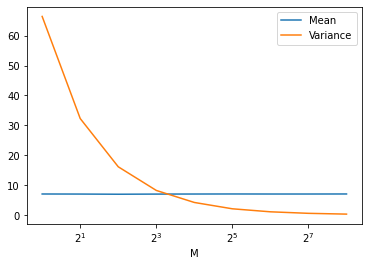

In [20]:
def monte_carlo_simulation(N):
    # Define the function f(x)
    def f(x):
        return 1 + 2*x + x**2

    # Initialize lists to store the results
    M_values = []
    means = []
    variances = []

    # Iterate over values of M
    for M in [2**i for i in range(9)]:
        # Initialize a list to store the results of N simulations
        fM_values = []

        # Perform N simulations
        for _ in range(N):
            # Generate M samples from the normal distribution with mean 1 and variance 3
            samples = np.random.normal(loc=1, scale=np.sqrt(3), size=M)

            # Evaluate f(x) for each sample
            evaluations = f(samples)

            # Take the average of all evaluations to approximate the expected value of f(X)
            expected_value_approximation = np.mean(evaluations)

            # Store the result of this simulation
            fM_values.append(expected_value_approximation)

        # Calculate the mean and variance of fM over N rounds
        mean = np.mean(fM_values)
        variance = np.var(fM_values)

        # Store the results
        M_values.append(M)
        means.append(mean)
        variances.append(variance)

    # Visualize the results
    plt.plot(M_values, means, label="Mean")
    plt.plot(M_values, variances, label="Variance")
    plt.xscale("log", base=2)
    plt.xlabel("M")
    plt.legend()
    plt.show()

# Run the simulation with N=10000
monte_carlo_simulation(10000)